# 7. 

### Leer la subseccion Skeletons de la seccion 9.5 del libro, y explique con sus palabras como se construye el esqueleto de un objeto binario mediante operaciones morfologicas.

La esqueletización de un objeto binario busca reducir su representación a una versión más delgada sin alterar la conectividad. Esto mediante erosiones sucesivas combinadas con aperturas condicionales hasta que la figura se reduce a una línea delgada (esqueleto).

Pasos básicos para construir el esqueleto:
1. Aplicar erosión repetidamente a la imagen binaria.
2. En cada paso, aplicar una operación de apertura con un elemento estructurante pequeño (por ejemplo, un disco).
3. Restar el resultado de la apertura a la imagen erosionada.
4. Acumular estos restos en cada iteración.
5. El proceso se detiene cuando la imagen ya no puede seguir erosionándose sin desaparecer.

### Investige como se implementan en Python las operaciones de (i) esqueletizaci´on, (ii) transformada de distancia desde el borde, y (iii) transformada de distancia desde el esqueleto. Puede usar Scikit-image, OpenCV, o alguna otra librer´ıa de su preferencia. Calcule estas tres transformaciones para una imagen binaria de su elecci´on

In [ ]:
# esqueteletizacion
from skimage import morphology

skeleton = morphology.skeletonize(binary)

In [ ]:
# Transformada de Distancia desde el Borde
from scipy.ndimage import distance_transform_edt

distance_from_edge = distance_transform_edt(binary) - distance_transform_edt(~binary)

In [ ]:
# Transformada de Distancia desde el Esqueleto
distance_from_skeleton = distance_transform_edt(skeleton)

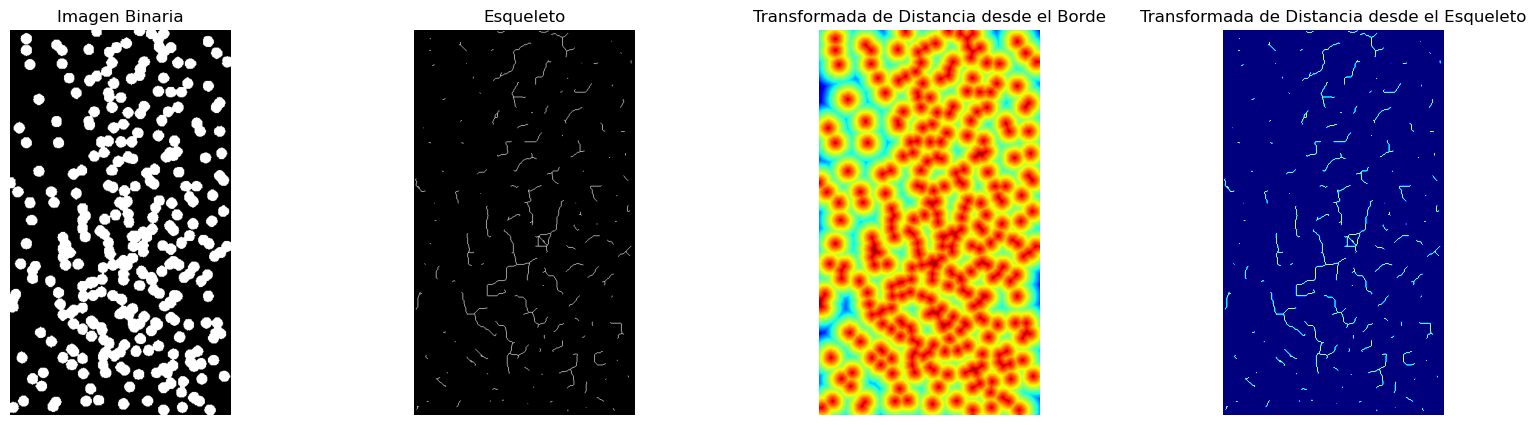

In [1]:
# Implementacion
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology
from skimage.filters import threshold_otsu
from scipy.ndimage import distance_transform_edt

# imagen binaria
image = io.imread("Images/microscope.png", as_gray=True)

# Umbralización para convertir en imagen binaria
thresh = threshold_otsu(image)
binary = image > thresh

# Esqueletización
skeleton = morphology.skeletonize(binary)

# Transformada de distancia desde el borde
distance_from_edge = distance_transform_edt(binary) - distance_transform_edt(~binary)

# Transformada de distancia desde el esqueleto
distance_from_skeleton = distance_transform_edt(skeleton)

# resultados
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(binary, cmap="gray")
axes[0].set_title("Imagen Binaria")
axes[1].imshow(skeleton, cmap="gray")
axes[1].set_title("Esqueleto")
axes[2].imshow(distance_from_edge, cmap="jet")
axes[2].set_title("Transformada de Distancia desde el Borde")
axes[3].imshow(distance_from_skeleton, cmap="jet")
axes[3].set_title("Transformada de Distancia desde el Esqueleto")

for ax in axes:
    ax.axis("off")

plt.show()
